In [1]:
# Google Drive'ı bağlama
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pretreined Model Run

In [3]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Okra ve normal klasörlerinin yolları
okra_klasoru = r"F:\PNG_Datasets\700_Sinirli_Cift\200_Test\Okrali"
normal_klasoru = r"F:\PNG_Datasets\700_Sinirli_Cift\200_Test\Saglikli"

# Verileri ve etiketleri depolamak için boş listeler
X = []
y = []

# Okra verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(okra_klasoru):
    dosya_yolu = os.path.join(okra_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    X.append(img_array)
    y.append(0)  # Okra sınıfı

# Normal verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(normal_klasoru):
    dosya_yolu = os.path.join(normal_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    X.append(img_array)
    y.append(1)  # Normal sınıfı

# Veriyi ve etiketleri Numpy dizilerine dönüştürme
X = np.array(X)
y = np.array(y)

# Verileri karıştırma
sirali_indeksler = np.arange(X.shape[0])
np.random.shuffle(sirali_indeksler)
X = X[sirali_indeksler]
y = y[sirali_indeksler]

# Modeli yükleyip verileri tahmin etme
model = load_model(r"C:\Users\AliBakiTURKOZ\OneDrive\Masaüstü\Engineering Project\saved_model\Deneme_Çift_Sinirli_CNN_Model_1_%85.5.h5", compile = False)
predictions = model.predict(X)  # Verileri tahmin etme

# Gerçek etiketlerin ve tahminlerin hazırlanması
true_labels = y
true_labels_cat = to_categorical(true_labels, num_classes=2)  # Gerçek etiketlerin kategorik hale getirilmesi
pred_prob_cat = predictions  # Tahmin olasılıklarının hesaplanması

# Doğruluk oranını ve kaybı hesaplama
accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
loss = log_loss(true_labels_cat, pred_prob_cat)

print(f"Doğruluk Oranı: {accuracy}")
print(f"Kayıp: {loss}")


C:\Users\AliBakiTURKOZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 799ms/step
Doğruluk Oranı: 0.8275
Kayıp: 0.4550926640201338


In [8]:
# Normalize edilmiş Veriler ile test kodu

import os
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Okra ve normal klasörlerinin yolları
okra_klasoru = "/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/700_Sinirli_Cift/200_Test/Okrali"
normal_klasoru = "/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/700_Sinirli_Cift/200_Test/Saglikli"

# Verileri ve etiketleri depolamak için boş listeler
X = []
y = []

# Okra verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(okra_klasoru):
    dosya_yolu = os.path.join(okra_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    img_array = img_array/255.0 # Normalizasyon
    X.append(img_array)
    y.append(0)  # Okra sınıfı

# Normal verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(normal_klasoru):
    dosya_yolu = os.path.join(normal_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    img_array = img_array/255.0 # Normalizasyon
    X.append(img_array)
    y.append(1)  # Normal sınıfı

# Veriyi ve etiketleri Numpy dizilerine dönüştürme
X = np.array(X)
y = np.array(y)

# Verileri karıştırma
sirali_indeksler = np.arange(X.shape[0])
np.random.shuffle(sirali_indeksler)
X = X[sirali_indeksler]
y = y[sirali_indeksler]



# Modeli yükleyip verileri tahmin etme
model = load_model('/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/saved_model/Best Models/Çift_Sinirli_CNN_Model_14_%85, 0.41_.h5', compile=False)
predictions = model.predict(X)  # Verileri tahmin etme

# Gerçek etiketlerin ve tahminlerin hazırlanması
true_labels = y
true_labels_cat = to_categorical(true_labels, num_classes=2)  # Gerçek etiketlerin kategorik hale getirilmesi
pred_prob_cat = predictions  # Tahmin olasılıklarının hesaplanması

# Doğruluk oranını ve kaybı hesaplama
accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
loss = log_loss(true_labels_cat, pred_prob_cat)

print(f"Doğruluk Oranı: {accuracy}")
print(f"Kayıp: {loss}")


FileNotFoundError: [WinError 3] Sistem belirtilen yolu bulamıyor: '/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/700_Sinirli_Cift/200_Test/Okrali'

#Her Adımda Accuracy ve Loss Değerlerini Basar

13/13 [==============================] - 89s 7s/step
Doğruluk Oranı: 0.8975
Kayıp: 0.32070413028680433
Tahminler ve Gerçek Etiketler:
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Sağlıklı - Gerçek Etiket: Sağlıklı
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Sağlıklı - Gerçek Etiket: Sağlıklı
Tahmin: Sağlıklı - Gerçek Etiket: Sağlıklı
Tahmin: Sağlıklı - Gerçek Etiket: Sağlıklı
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Sağlıklı - Gerçek Etiket: Sağlıklı
Tahmin: Okratoksinli - Gerçek Etiket: Sağlıklı
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Sağlıklı - Gerçek Etiket: Sağlıklı
Tahmin: Okratoksinli - Gerçek Etiket: Okratoksinli
Tahmin: Sağlıklı - Gerçek Etiket: Sağlıklı
Tahmin: 

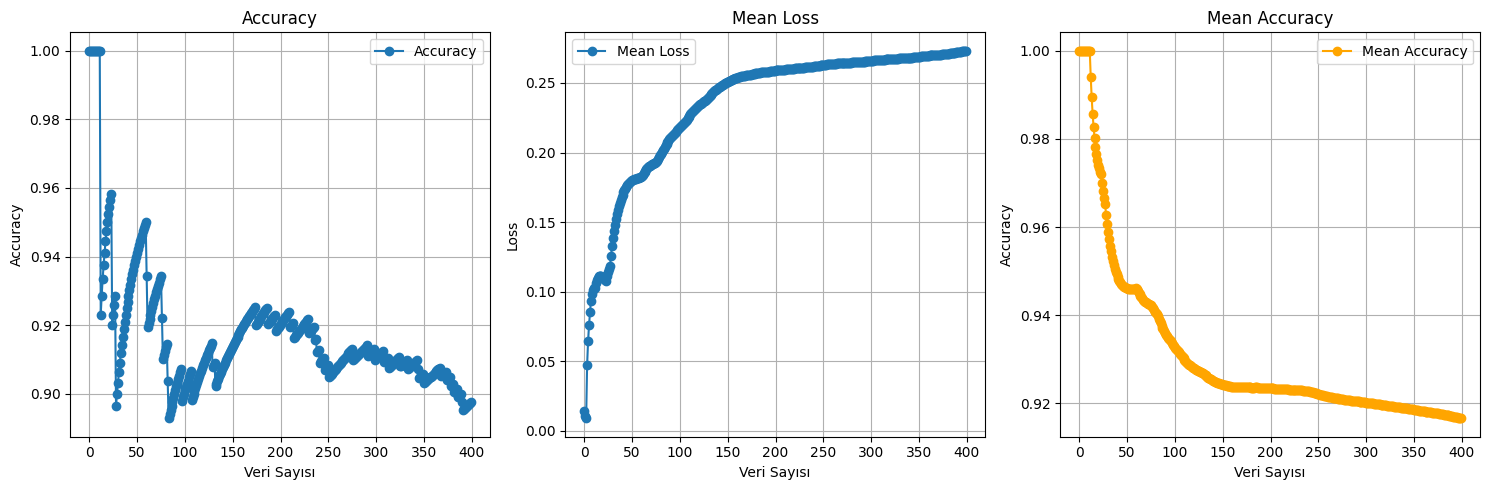

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Okra ve normal klasörlerinin yolları
okra_klasoru = "/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/700_Sinirli_Cift/200_Test/Okrali"
normal_klasoru = "/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/700_Sinirli_Cift/200_Test/Saglikli"

# Verileri ve etiketleri depolamak için boş listeler
X = []
y = []

# Okra verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(okra_klasoru):
    dosya_yolu = os.path.join(okra_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    X.append(img_array)
    y.append(0)  # Okra sınıfı

# Normal verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(normal_klasoru):
    dosya_yolu = os.path.join(normal_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    X.append(img_array)
    y.append(1)  # Normal sınıfı

# Veriyi ve etiketleri Numpy dizilerine dönüştürme
X = np.array(X)
y = np.array(y)

# Verileri karıştırma
sirali_indeksler = np.arange(X.shape[0])
np.random.shuffle(sirali_indeksler)
X = X[sirali_indeksler]
y = y[sirali_indeksler]

# Modeli yükleyip verileri tahmin etme
model = load_model('/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/saved_model/Best Models/Deneme_Çift_CNN_Model_7_%84.5_.h5')  # Kaydedilmiş modeli yükleme
predictions = model.predict(X)  # Verileri tahmin etme

# Gerçek etiketlerin ve tahminlerin hazırlanması
true_labels = y
true_labels_cat = to_categorical(true_labels, num_classes=2)  # Gerçek etiketlerin kategorik hale getirilmesi
pred_prob_cat = predictions  # Tahmin olasılıklarının hesaplanması

# Doğruluk oranını ve kaybı hesaplama
accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
loss = log_loss(true_labels_cat, pred_prob_cat)

print(f"Doğruluk Oranı: {accuracy}")
print(f"Kayıp: {loss}")

# Her aşamadaki tahmin ve gerçek etiketleri yazdırma
print("Tahminler ve Gerçek Etiketler:")
for i in range(len(true_labels)):
    tahmin = 'Okratoksinli' if np.argmax(predictions[i]) == 0 else 'Sağlıklı'
    gerçek_etiket = 'Okratoksinli' if true_labels[i] == 0 else 'Sağlıklı'
    print(f"Tahmin: {tahmin} - Gerçek Etiket: {gerçek_etiket}")

# Accuracy oranlarının yazdırılması
accuracy_list = [accuracy_score(true_labels[:i+1], np.argmax(predictions[:i+1], axis=1)) for i in range(len(true_labels))]
print("Her Aşamadaki Accuracy Oranları:")
for i, acc in enumerate(accuracy_list):
    print(f"Veri sayısı: {i+1}, Accuracy: {acc}")

# Loss ve accuracy grafiğinin çizdirilmesi
loss_list = []
mean_loss_list = []
for i in range(len(true_labels)):
    loss_list.append(log_loss(true_labels_cat[:i+1], pred_prob_cat[:i+1]))
    mean_loss_list.append(np.mean(loss_list))  # Tüm epochlar için loss ortalaması alınıyor

# Accuracy'lerin ortalamasını alalım
mean_accuracy_list = [np.mean(accuracy_list[:i+1]) for i in range(len(accuracy_list))]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(len(true_labels)), accuracy_list, marker='o', linestyle='-', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Veri Sayısı')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(true_labels)), mean_loss_list, marker='o', linestyle='-', label='Mean Loss')
plt.title('Mean Loss')
plt.xlabel('Veri Sayısı')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(true_labels)), mean_accuracy_list, marker='o', linestyle='-', color='orange', label='Mean Accuracy')
plt.title('Mean Accuracy')
plt.xlabel('Veri Sayısı')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#DENEME RASPBERRY İÇİN


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix

# Öncelikle modeli ve veri setini yükleyelim
model = tf.keras.models.load_model('/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/saved_model/Deneme_Çift_CNN_Model_7_.h5')  # Model dosyasının adını ve yolunu ayarlayın
test_dir = '/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/200_TEST_DATASET_ÇİFTGRAFİK_512x512'  # Test veri setinin dizinini ayarlayın

# Test veri setindeki görüntüleri yükleme ve ön işleme fonksiyonu
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(512, 512))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return np.expand_dims(img_array, axis=0)

# Test veri setini yükleme ve modeli değerlendirme
def evaluate_model(test_dir):
    test_datagen = image.ImageDataGenerator(preprocessing_function=preprocess_input)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(512, 512),
        batch_size=1,
        class_mode='binary',  # İki sınıf olduğu için 'binary' olarak ayarlayın
        shuffle=False
    )

    # Modeli değerlendirme
    loss, accuracy = model.evaluate(test_generator)

    print("Doğruluk:", accuracy)
    print("Kayıp:", loss)

    # Tahminleri ve gerçek etiketleri alarak bir sınıflandırma raporu oluşturma
    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred = np.argmax(y_pred, axis=1)
    print("Sınıflandırma Raporu:")
    print(classification_report(y_true, y_pred))

# Modeli ve test veri setini değerlendirme
evaluate_model(test_dir)


Found 400 images belonging to 2 classes.
400/400 [==============================] - 112s 280ms/step - loss: 0.7621 - accuracy: 0.5750
Doğruluk: 0.574999988079071
Kayıp: 0.7620721459388733
400/400 [==============================] - 93s 231ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.15      0.26       200
           1       0.54      1.00      0.70       200

    accuracy                           0.57       400
   macro avg       0.77      0.57      0.48       400
weighted avg       0.77      0.57      0.48       400



In [ ]:
# HAN BEY SİSTEMİNDEKİ MODEL TEST KODU

import os
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Okra ve normal klasörlerinin yolları
okra_klasoru = "/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/700_Sinirsiz_Cift/200_Test/Okrali"
normal_klasoru = "/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Grafikler/Çift_Grafikler/700_Sinirsiz_Cift/200_Test/Saglikli"

# Verileri ve etiketleri depolamak için boş listeler
X = []
y = []

# Okra verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(okra_klasoru):
    dosya_yolu = os.path.join(okra_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    X.append(img_array)
    y.append(0)  # Okra sınıfı

# Normal verilerini yükleme ve etiketleme
for dosya_adi in os.listdir(normal_klasoru):
    dosya_yolu = os.path.join(normal_klasoru, dosya_adi)
    img = load_img(dosya_yolu, target_size=(512, 512))
    img_array = img_to_array(img)
    X.append(img_array)
    y.append(1)  # Normal sınıfı

# Veriyi ve etiketleri Numpy dizilerine dönüştürme
X = np.array(X)
y = np.array(y)

# Verileri karıştırma
sirali_indeksler = np.arange(X.shape[0])
np.random.shuffle(sirali_indeksler)
X = X[sirali_indeksler]
y = y[sirali_indeksler]

# Modeli yükleyip verileri tahmin etme
model = load_model('/content/drive/MyDrive/AliBaki_TURKOZ_Engineering_Project/saved_model/HAN BEY SISTEMINDEKI VERILER VE MODELLER/Sinirsiz_Cift_Best_Result/Sinirsiz_Cift_83.25_0.38.h5')  # Kaydedilmiş modeli yükleme
predictions = model.predict(X)  # Verileri tahmin etme

# Gerçek etiketlerin ve tahminlerin hazırlanması
true_labels = y
true_labels_cat = to_categorical(true_labels, num_classes=2)  # Gerçek etiketlerin kategorik hale getirilmesi
pred_prob_cat = predictions  # Tahmin olasılıklarının hesaplanması

# Doğruluk oranını ve kaybı hesaplama
accuracy = accuracy_score(true_labels, np.argmax(predictions, axis=1))
loss = log_loss(true_labels_cat, pred_prob_cat)

print(f"Doğruluk Oranı: {accuracy}")
print(f"Kayıp: {loss}")



TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [32, 512, 512, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']